# [Assignment 4 ] Polynomial Regression - Scikit-Learn

In this assignment, we would like to predict *Total Sales* based on *TV Advertisement (X1)* and *Radio advertisement(X2)*:

$$Y=\theta_0+\theta_1X_1+\theta_2X_1^2+\theta_3X_2+\theta_4X_2^2$$

*As shown in the equation above, we will use <font color='red'> the features and their squared version </font> so this is a polinomial regression.*

## Step 0: Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Setup dataset 
1.    Download the dataset (.csv file) from Kaggle https://www.kaggle.com/ishaanv/ISLR-Auto and upload it to your colab notebook
2.    Load the csv file to a DataFrame callsed data

In [2]:
### BEGIN SOLUTION
data=pd.read_csv('Advertising.csv')
### END SOLUTION

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Step 2: Form the features/Label

1.   Create a **DataFrame** named **X** which contains 4 columns named: 'TV', 'TV^2', 'Radio', 'Radio^2'
2.   Create a **DataFrame** named **Y** which containes one column named 'Sales'

<Font color='red'> X contain features and Y contains label

In [4]:
### BEGIN SOLUTION
X = pd.DataFrame({'TV' : data['TV'], 'TV^2' : data['TV']**2, 'Radio' : data['Radio'], 'Radio^2' : data['Radio']**2})
Y = pd.DataFrame({'Sales' : data['Sales']})
### END SOLUTION

If you have done the task in step 2 correct, the following block should print True

In [5]:
X['TV'][2]+X['TV^2'][2]+X['Radio'][2]+X['Radio^2'][2]+Y['Sales'][2]==2475.05

True

## Step 3: Split the dataset

Import `train_test_split` from Scikit-learn and split the Features(X) and Label(Y) to 70% training subset and 30% test subset



In [6]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### END SOLUTION

<font color=red>You should now have 4 variables: X_train, X_test, Y_train, Y_test

## Step 4: Form your model

import `LinearRegression` and form a varibale colled **model**

*Note: dont forget to enable the normalization!*

In [7]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)


### END SOLUTION

## Step 5: Train your model

Train your model using **X_trai**n and **Y_train**

In [8]:
### BEGIN SOLUTION

model.fit(X_train, Y_train)

### END SOLUTION

/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

<font color='red'>At this point, you will get a warning message:</font>

**FutureWarning: 'normalize' was deprecated...** 

<font color='red'>Please ignore this message and do **not** apply manual normalization or standardization in this assignment. </font>

We will discuss StandardScalar in the upcoming videos.



## Step 6: Check the result

Print all 5 parameters; coefficients and intercept) to verify that training worked

In [9]:
### BEGIN SOLUTION

print(model.get_params())
print(model.coef_)
print(model.intercept_)


### END SOLUTION

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
[[ 8.74647084e-02 -1.37992913e-04  1.88607050e-01  2.75822189e-04]]
[0.42956031]


## Step 7: Predictions

Use the trained model to predict the sales for the trainig subset and test subset

In [10]:
### BEGIN SOLUTION


test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

### END SOLUTION

Run the following block of code and check visually to verify your predictions are acceptable! The plots show the prediction only on the test subset of the dataset.






Text(0, 0.5, 'Sales')

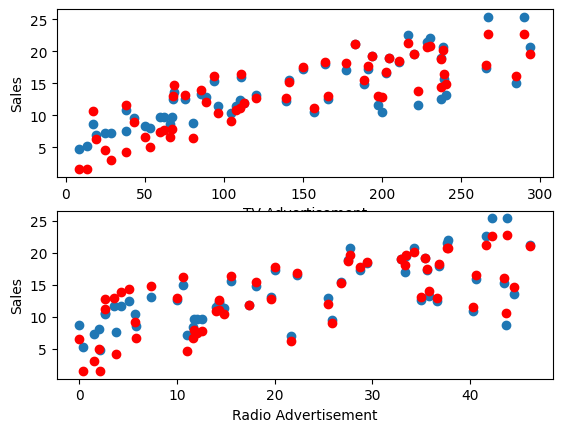

In [11]:
plt.subplot(211)
plt.scatter(X_test['TV'],Y_test)
plt.scatter(X_test['TV'],test_predictions,color='red')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales')
plt.subplot(212)
plt.scatter(X_test['Radio'],Y_test)
plt.scatter(X_test['Radio'],test_predictions,color='red')
plt.xlabel('Radio Advertisement')
plt.ylabel('Sales')

Go through the following code and learn how to create a 3D plot of the predictions vs actual values. Run the following block of code and check again visually to verify your predictions are acceptable! The following plot shows the predictions only on the test subset of the dataset.


Text(0.5, 0, 'Total Sales')

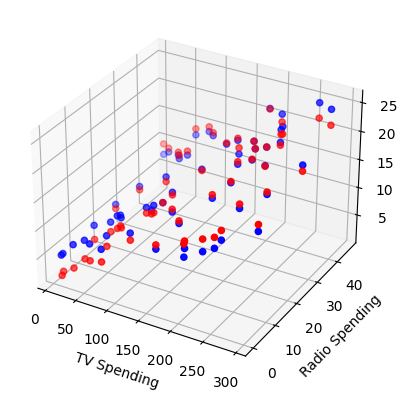

In [12]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_test['TV'],X_test['Radio'],test_predictions,color='red')
ax.scatter3D(X_test['TV'],X_test['Radio'],Y_test, color='blue')
ax.set_xlabel('TV Spending')
ax.set_ylabel('Radio Spending')
ax.set_zlabel('Total Sales')


## Step 8: Result Analysis

*   Find the absolut difference of the predicted values and actual values (residuals) for the testing subset of the dataset
*   Find the absolut difference of the predicted values and actual values (residuals) for the training subset of the dataset

In [13]:
### BEGIN SOLUTION


test_res = Y_test - test_predictions

train_res= Y_train - train_predictions

### END SOLUTION

Run the following code block to visualize the distribution of the residuals. If you calculated the residuals correct, the plots should show up!

Text(0, 0.5, 'Difference')

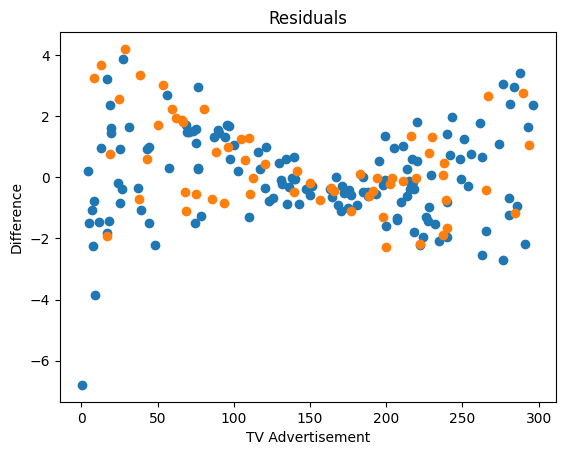

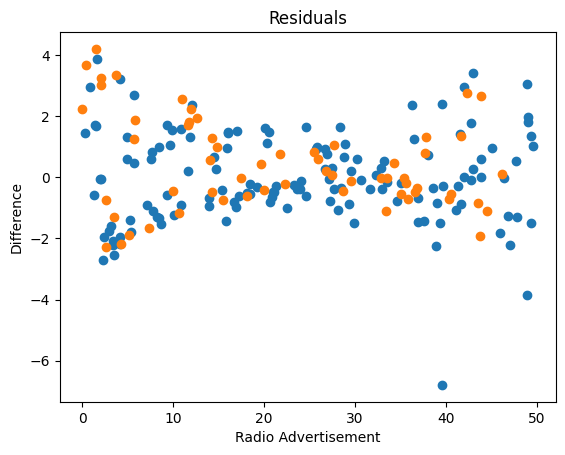

In [14]:
plt.scatter(X_train['TV'],train_res)
plt.scatter(X_test['TV'],test_res)
plt.title('Residuals')
plt.xlabel('TV Advertisement')
plt.ylabel('Difference')
plt.figure()
plt.scatter(X_train['Radio'],train_res)
plt.scatter(X_test['Radio'],test_res)
plt.title('Residuals')
plt.xlabel('Radio Advertisement')
plt.ylabel('Difference')

In the following block find the mean square error (MSE) for

*   Training subset of the dataset
*   Testing subset of the dataset



In [15]:
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE_Test = mean_squared_error(Y_test, test_predictions)
MSE_Train = mean_squared_error(Y_train, train_predictions)


### END SOLUTION

In [16]:
print(MSE_Train,MSE_Test)

2.2658253812552758 2.48237712994426
